In [26]:
import librosa 
from scipy.io import wavfile as wav
import numpy as np

filename = './airport-barcelona-0-0-a.wav'

librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename) 

print('Original sample rate:', scipy_sample_rate) 
print('Librosa sample rate:', librosa_sample_rate) 

Original sample rate: 44100
Librosa sample rate: 22050


In [27]:
print('Original audio file min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))
print('Librosa audio file min~max range:', np.min(librosa_audio), 'to', np.max(librosa_audio))

Original audio file min~max range: -353044992 to 331355904
Librosa audio file min~max range: -0.1579599 to 0.15362494


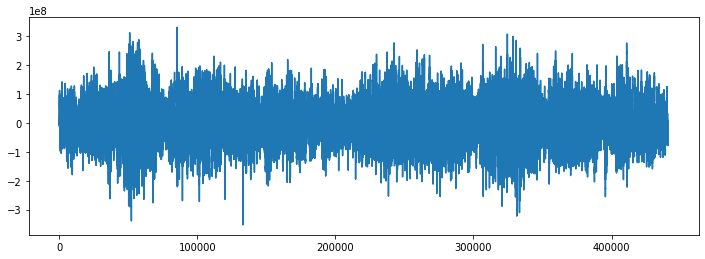

In [28]:
import matplotlib.pyplot as plt

# Original audio channels
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)

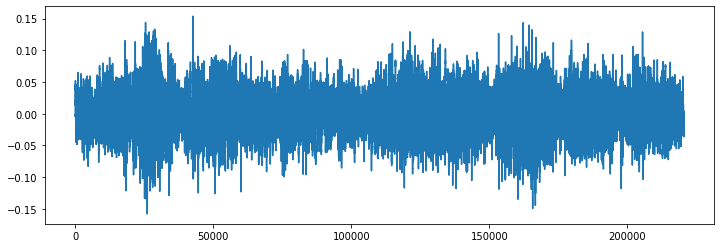

In [29]:
# Librosa audio with channels merged 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio)

In [37]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 431)


In [38]:
mel_spectrogram = librosa.feature.melspectrogram(y=librosa_audio, sr=librosa_sample_rate, win_length=882, hop_length=441, n_fft=2048, n_mels=40)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
log_mel_spectrogram.shape

(40, 501)

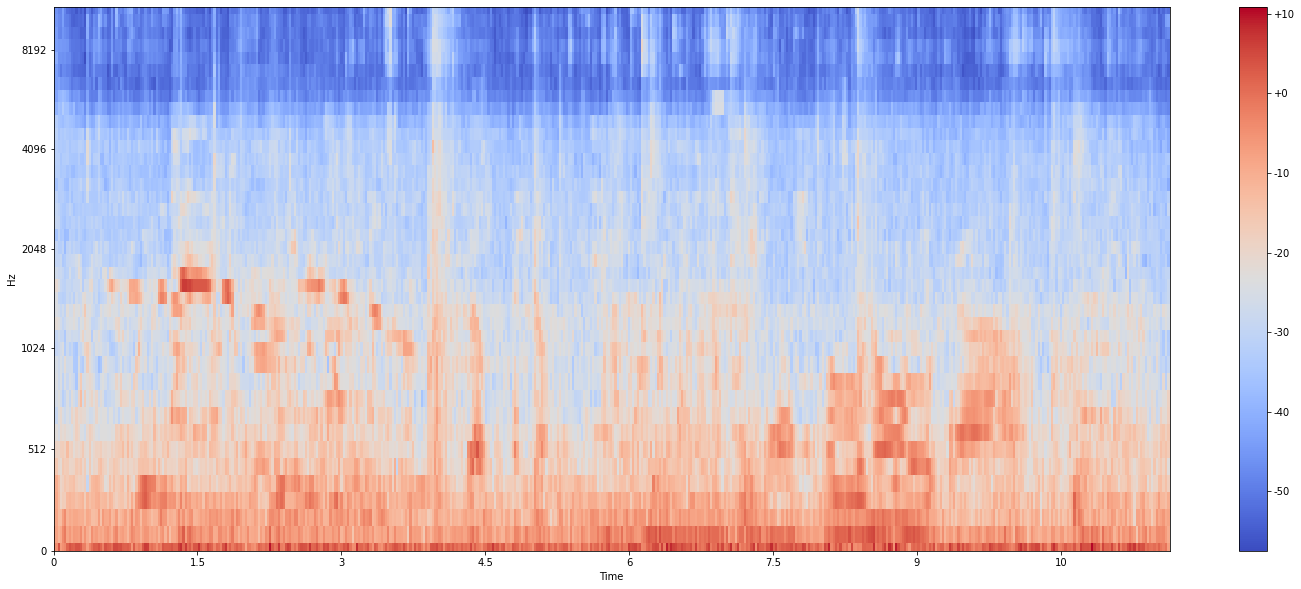

In [39]:
import librosa.display
# librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=librosa_sample_rate)
plt.colorbar(format="%+2.f")
plt.show()

In [40]:
def extract_mfcc_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

def extract_mel_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mels = librosa.feature.melspectrogram(y=audio, sr=librosa_sample_rate, win_length=882, hop_length=441, n_fft=2048, n_mels=40)
        log_mels = librosa.power_to_db(mels)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return log_mels

In [25]:
# Load various imports 
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 
fulldatasetpath = '../../Datasets/TAU_Urban_Acoustic_Scenes_2020_Mobile_Development/'

metadata = pd.read_csv('../../Datasets/TAU_Urban_Acoustic_Scenes_2020_Mobile_Development/meta_data/meta.csv', sep=r'\t', engine='python')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["filename"]))
    
    class_label = row["scene_label"]
    data = extract_mel_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 

KeyboardInterrupt: 

In [ ]:
featuresdf.head()

In [ ]:
# Storing in JSON
json_path = "mel_data.json"

data = featuresdf.to_json(orient = 'split')

with open(json_path, "w") as fp:
    json.dump(data, fp, indent=4)